Analyse the project
Here we are going to analyse the quality of the wine and how good it is.
1) Data Sets
2) Data Analysis
3) Exploratory Data Analysis
4) Data Processing
4) Split data
5) Modeling 
4) classification model

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score

In [2]:
#import the data 
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# using fized acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, 
# density, ph, sulphates, alcohol we are going to predict the quality of the wine

Exploratery Data Analysis - analysing the data using visual techniques

In [5]:
# number of rows and columns 
df.shape

(1599, 12)

In [6]:
# to know the columns name 
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
#to know the data type of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# check if there is any null values in column vise
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualaization

In [9]:
#descriptive statistical measures of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


from the above describe we can observe
1) all the count values are same so there is no missing value
2) the mean value is lesser than median(50%) in fixed acidity, residual sugar which means the data is skewed to left

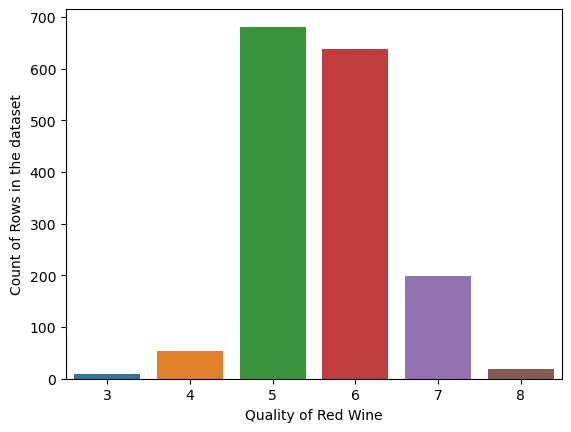

In [10]:
# lets see how many rows/wines for each quality
#Numerical data – number data 
#categorical data – where the numbers are less in unique or number are in group and are very less
sns.countplot(data=df, x="quality")
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

We can see there is no 1 and 2. There are only 6 quality. If the quality value is less then the wine quality is less. Here the count or more number of wines are for 5 and 6 quality

we need to analyse for each element against quality

In [11]:
# this proves the above plot
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<Axes: xlabel='quality', ylabel='volatile acidity'>

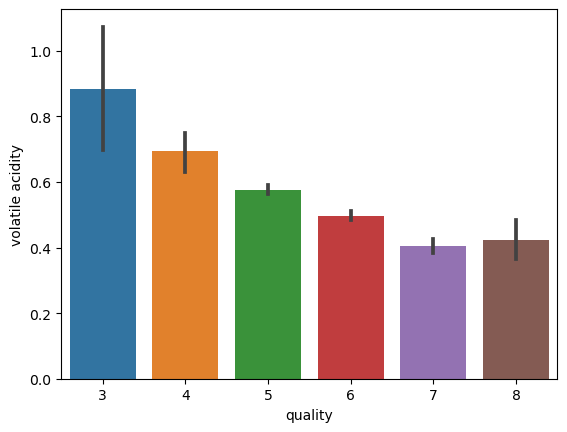

In [12]:
# compare each chemical element with quality so we know how quality is impacted
sns.barplot(x='quality', y='volatile acidity', data=df)

so here we can see the quality of volatile acidity is more that means, when the volatile acidity is more the quality of wine is less.

<Axes: xlabel='quality', ylabel='citric acid'>

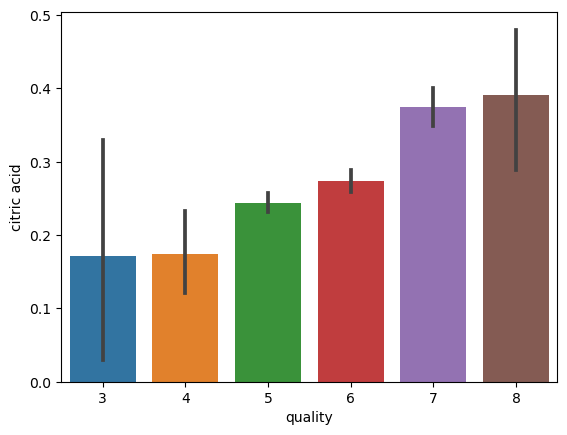

In [13]:
sns.barplot(x='quality', y='citric acid', data=df)

So here we can see the quality of wine is good when the citric acid is more

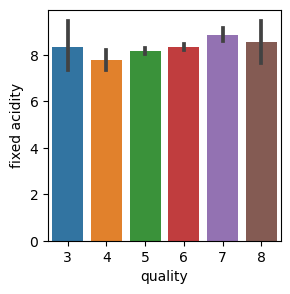

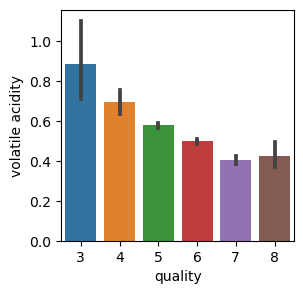

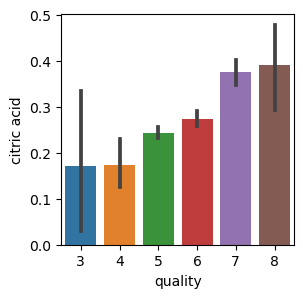

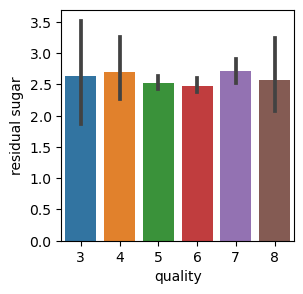

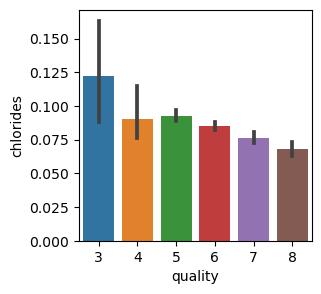

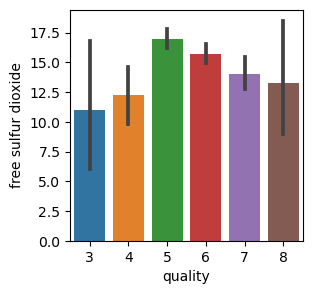

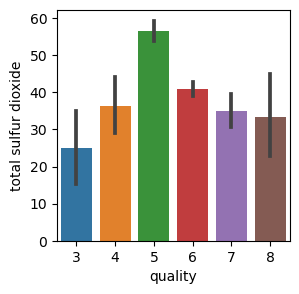

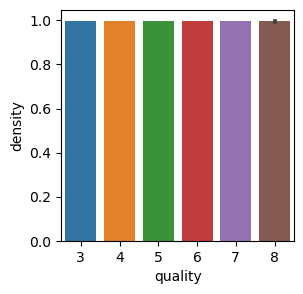

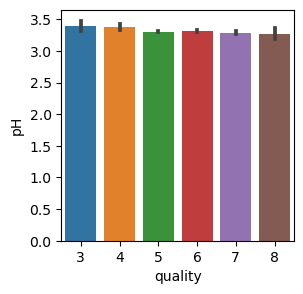

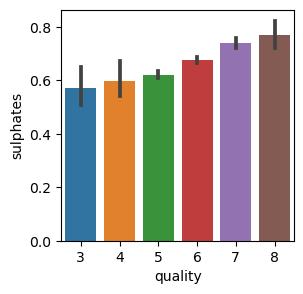

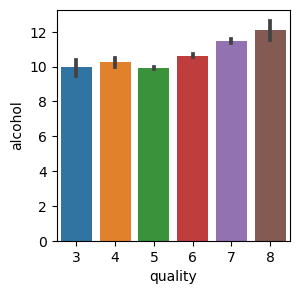

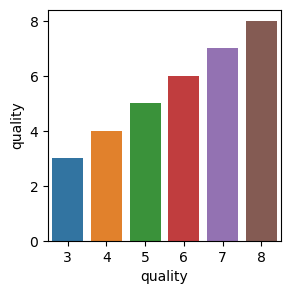

In [14]:
for col in df.columns:
    plt.figure(figsize=(3,3))
    plt.tight_layout()
    sns.barplot(x='quality', y=col, data=df)

from the above plot we can say when volatile acidity and chlorides are less and citric acid and sulphates are more the quality of the wine will be good. 

Now let us know the co-relation between all the columns(dependent) to the quality(independent variables) column using heatmap

<Axes: >

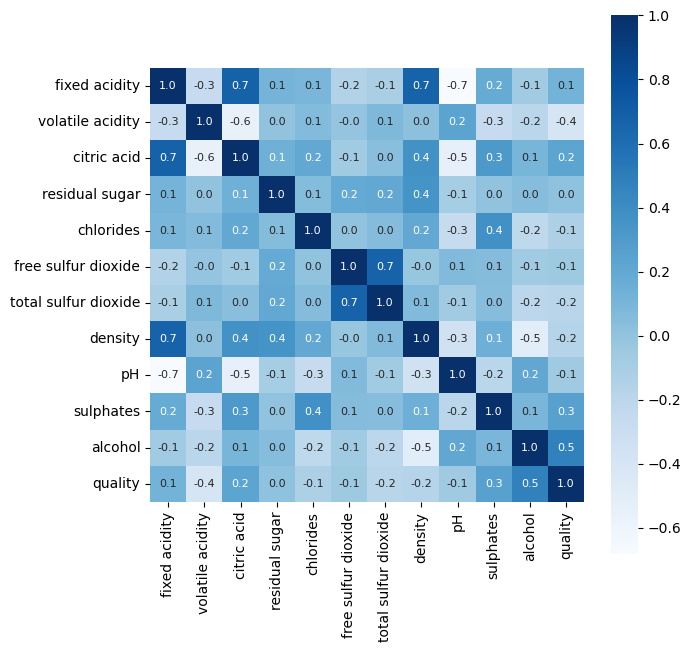

In [15]:
plt.figure(figsize=(7,7))
#sns.heatmap(data,colourbar,squareshape,fmt=onefloatvalue,annot_kws=columnnamesize,cmap=colouryouchoose)
sns.heatmap(df.corr(), cbar=True, square=True, annot=True, fmt='0.1f', cmap="Blues", annot_kws={'size':8})

here we can see which columns are positively corelated(dark blue) and which are negetively corelated(light blue)

so from the heatmap we can say alcohol, sulphates, fixed acidity and citric acid are positively corelated with quality 

let's divide the data into features (X) and labels (y). 

Now lets seperate quality column from others

In [16]:
# we are going to seperate it temp where it has been assign to variable X
X=df.drop('quality',axis=1) #axis=1 to drop column. axis=0 to drop row
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Y will be the quality column

In [17]:
Y=df['quality']
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [18]:
# let us see how how many values are there for each quality value
Y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Now lets replace the quality value to 1 or 0.
quality value to be 0 when less than or equal to 6 
quality value to be 1 when greater than or equal to 7

We need to use lambda function to create the if statement

In [19]:
Y=df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [20]:
# So now we must have only 0 and 1 
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

here we can see bad quality wine is 1382 and good quality wine is 217.

<Axes: xlabel='quality', ylabel='count'>

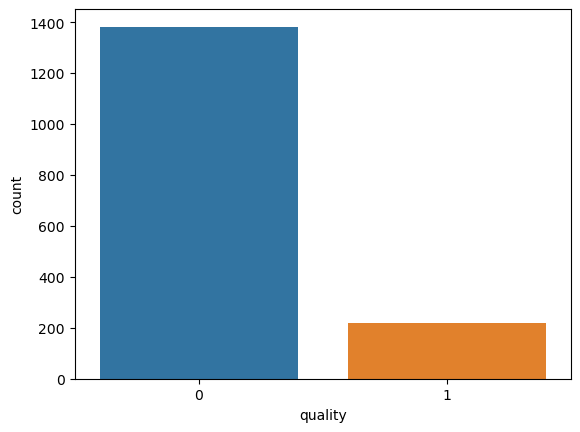

In [21]:
sns.countplot(data=df, x=Y)  

Train & test split - we are going to train the data with ml and evaluate the data with test

The train_test_split() method is used to split our data into training set and testing sets. 

In [22]:
# we are considering 20% of the overall data 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
# lets see the value - X_train X_test
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [24]:
# lets see the value - Y_train Y_test
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Training our Model

In [25]:
#LogisticRegression:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
Y_pred1 = model1.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test,Y_pred1))

Accuracy Score: 0.884375


LogisticRegression accuracy is: 88.43%

In [26]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       279
           1       0.58      0.34      0.43        41

    accuracy                           0.88       320
   macro avg       0.75      0.65      0.68       320
weighted avg       0.87      0.88      0.87       320



In [27]:
#KNN
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.88125


KNeighborsClassifier accuracy is: 88.12%

In [28]:
print(classification_report(Y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       279
           1       0.54      0.51      0.53        41

    accuracy                           0.88       320
   macro avg       0.73      0.72      0.73       320
weighted avg       0.88      0.88      0.88       320



In [29]:
#SVC
model3 = SVC()
model3.fit(X_train,Y_train)
pred_y3 = model3.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test,pred_y3))

Accuracy Score: 0.875


Support Vector Classification accuracy is: 87.5%

In [30]:
print(classification_report(Y_test,pred_y3))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       279
           1       1.00      0.02      0.05        41

    accuracy                           0.88       320
   macro avg       0.94      0.51      0.49       320
weighted avg       0.89      0.88      0.82       320



In [31]:
#DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.8875


Decision Tree Classifier accuracy is: 88.12%

In [32]:
print(classification_report(Y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       279
           1       0.56      0.61      0.58        41

    accuracy                           0.89       320
   macro avg       0.75      0.77      0.76       320
weighted avg       0.89      0.89      0.89       320



In [33]:
#RandomForestClassifier
model5 = RandomForestClassifier(random_state=10)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.921875


Random Forest Classifier accuracy is: 88.43%

In [34]:
print(classification_report(Y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       279
           1       0.74      0.61      0.67        41

    accuracy                           0.92       320
   macro avg       0.84      0.79      0.81       320
weighted avg       0.92      0.92      0.92       320



In [35]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree', 'Random Forest'],
    'Score': [0.8843,0.88125,0.875,0.884375,0.921875]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.921875,Random Forest
0.884375,Decision Tree
0.884300,Logistic Regression
0.881250,KNN
0.875000,SVC


In [36]:
# this proves Random Forest algorithms is good for training the model.

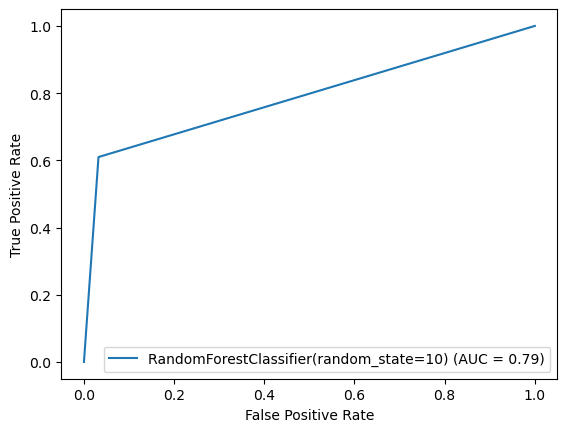

In [37]:
fpr, tpr, thresholds=metrics.roc_curve(Y_test,y_pred5)
auc=metrics.auc(fpr,tpr)
view=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc,estimator_name=model5)
view.plot()